In [1]:
#!pip install --upgrade azure-cognitiveservices-vision-face

In [2]:
#!pip install pillow

In [3]:
#!pip install opencv-python

In [1]:
from msrest.authentication import CognitiveServicesCredentials
from azure.cognitiveservices.vision.face import FaceClient

import cv2
from IPython.display import Image
from matplotlib import pyplot as plt

In [2]:
subscription_key = "3c4c8a7bbfa7427786b5644453e3377e"
endpoint = "https://visionfaceprateek.cognitiveservices.azure.com/"
cv_face_client = FaceClient(endpoint, CognitiveServicesCredentials(subscription_key))

In [3]:
image_name = "./SIT788_5_1_Data//69999_test_2000.png"
#image_name = "./SIT788_5_1_Data//69954.png"
image = open(image_name, 'rb')

In [4]:
#Detect face with age, emotion, gender and accessories
attributes_list = ['age', 'emotion', 'gender', 'accessories']
detected_faces = cv_face_client.face.detect_with_stream(image, 
                                                        return_face_attributes=attributes_list)
if len(detected_faces) > 0:
    print ("Number of faces detected: ", len(detected_faces))
    faces_rect = []
    for faces_itr in range(len(detected_faces)):
        faces_rect.append([detected_faces[faces_itr].face_rectangle.left, detected_faces[faces_itr].face_rectangle.top,
        detected_faces[faces_itr].face_rectangle.width,
        detected_faces[faces_itr].face_rectangle.height])
else:
    print("No face detected")
print("List of face coordinates: ", faces_rect)

Number of faces detected:  3
List of face coordinates:  [[1225, 180, 213, 213], [518, 330, 193, 193], [867, 425, 175, 175]]


Age for Face 0 : 52.0 Emotion:  happiness Gender: male
No Accessories found for Face 0
______________________________
Age for Face 1 : 64.0 Emotion:  happiness Gender: male
Accessories: {'type': 'glasses', 'confidence': 0.94} for Face 1
______________________________
Age for Face 2 : 58.0 Emotion:  happiness Gender: female
Accessories: {'type': 'glasses', 'confidence': 0.94} for Face 2
______________________________


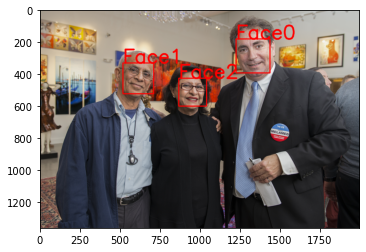

In [5]:
disp_image = cv2.imread(image_name)

for faces_itr in range(len(detected_faces)):
    gender = detected_faces[faces_itr].face_attributes.gender.value
    age = detected_faces[faces_itr].face_attributes.age
    emotions_dict = detected_faces[faces_itr].face_attributes.emotion.as_dict()
    emotion_name = max(zip(emotions_dict.values(), emotions_dict.keys()))[1]
    
    org = (detected_faces[faces_itr].face_rectangle.left, 
           detected_faces[faces_itr].face_rectangle.top)
    font = cv2.FONT_HERSHEY_SIMPLEX
    fontScale = 4
    color = (0, 0,255)
    thickness = 10
    text = "Face" + str(faces_itr)
    
    image = cv2.putText(disp_image, text, org, font, 
                   fontScale, color, thickness, cv2.LINE_AA)

    
    disp_image = cv2.rectangle(disp_image, faces_rect[faces_itr], (0,0,255), 5)
    
    print ("Age for Face", faces_itr, ":", age, "Emotion: ", emotion_name, "Gender:", gender)
    accessories_list = detected_faces[faces_itr].face_attributes.accessories
    if len(accessories_list) > 0:
        for acc_itr in range(len(accessories_list)):
            print("Accessories:", accessories_list[acc_itr].as_dict(), "for Face", 
              faces_itr)
    else:
        print("No Accessories found for Face", 
              faces_itr)
    print("______________________________")
disp_image_ = cv2.cvtColor(disp_image, cv2.COLOR_BGR2RGB)
plt.imshow(disp_image_)
plt.show()